# 1.1 Unzip the Data

First, you need to unzip the Images.zip file to access the ultrasound images.

# 1.2 Inspect the Files
Next, you’ll need to load and inspect the CSV files: Train.csv and Test.csv. These files contain metadata about the images.

In [8]:
import pandas as pd

In [9]:
train_csv_path = 'F:\\DATA SCIENCE SKILLS TECHNOLOGY\\FIELD PPT 2024- AI, ML\\CAMEROON ANALYTICS\\Train.csv'
test_csv_path = 'F:\\DATA SCIENCE SKILLS TECHNOLOGY\\FIELD PPT 2024- AI, ML\\CAMEROON ANALYTICS\\Test.csv'

In [10]:
train_data = pd.read_csv(train_csv_path)
test_data = pd.read_csv(test_csv_path)

In [11]:
print("Training Data:")
print(train_data.head())

Training Data:
         img_IDs  target
0  ID_04UTZ83A24       0
1  ID_0URH2U2RON       1
2  ID_0ZEPOZGGQ1       0
3  ID_1595QTX5OA       1
4  ID_1RAE4SS5S6       1


In [12]:
print("Test Data:")
print(test_data.head())

Test Data:
         img_IDs
0  ID_07VWE8S4AH
1  ID_1TTSQF7HN0
2  ID_21WVBU9ZMU
3  ID_2MHAFTL1KN
4  ID_37ULEGW12M


# 1.3 Check Image Quality
You can load a sample image to check its quality and dimensions.

In [25]:
# Access the directory where your images are there
images_directory = r'F:\DATA SCIENCE SKILLS TECHNOLOGY\FIELD PPT 2024- AI, ML\CAMEROON ANALYTICS\images\CAMAIRAI BOX READY'

In [33]:
# Load image
# Get the ID of the first image
import os

sample_image_id = train_data.iloc[0]['img_IDs']
sample_image_path = os.path.join(images_directory, f"{sample_image_id}.JPG")

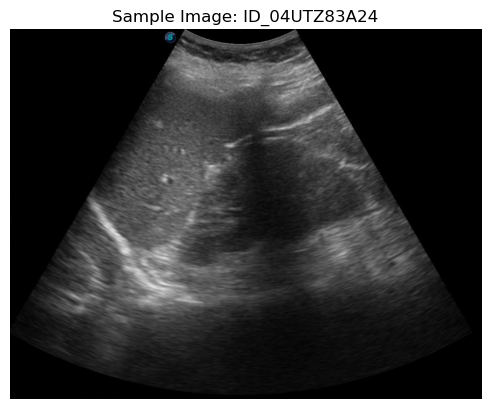

In [34]:
# Open and display the image
from PIL import Image
import matplotlib.pyplot as plt

sample_image = Image.open(sample_image_path)
plt.imshow(sample_image)
plt.title(f"Sample Image: {sample_image_id}")
plt.axis('off')
plt.show()

In [35]:
# Print the image size
print(f"Image size: {sample_image.size}")

Image size: (1039, 815)


# Step 2: Preprocessing
In this step, we will prepare the data for modeling by resizing the images, normalizing the pixel values, and performing data augmentation.

2.1 Load and Resize Images

To ensure consistency, we'll resize all images to a fixed size, which is essential for feeding them into a neural network.

In [36]:
# Define the target size for the images
target_size = (128, 128)

In [37]:
# Create a function to resize the image
def resize_image(image_path, target_size):
    with Image.open(image_path) as img:
        image_resized = img.resize(target_size)
    return image_resized

In [38]:
# Resize all images in the Training set and store it in the
# train_images and train_labels

train_images = []
train_labels = []

for image_id, label in zip(train_data['img_IDs'], train_data['target']):
    image_path = os.path.join(images_directory, f"{image_id}.JPG")
    image_resized = resize_image(image_path, target_size)
    train_images.append(image_resized)
    train_labels.append(label)

In [39]:
# Convert the list of images to a format suitable
# for model (eg. Numpy arrays)

import numpy as np

train_images_np = np.array([np.array(image) for image in train_images])
train_labels_np = np.array(train_labels)

print(f"Resized images shape: {train_images_np.shape}")
print(f"Labels shape: {train_labels_np.shape}")

Resized images shape: (100, 128, 128, 3)
Labels shape: (100,)


2.2 Normalize Images

Normalization helps to scale the pixel values to a range that is easier for the model to process.

In [40]:
# Normalize the images to the range of [0, 1]

train_images_np = train_images_np / 255.0
print("Images normalized")

Images normalized


**2.3 Data Augmentation**

Data augmentation is a technique used to increase the diversity of your training data by applying random transformations to the images, such as rotations, flips, and zooms.

**Understanding Data Augmentation**

**Data Augmentation** is a technique used in machine learning, especially in computer vision, to artificially expand the size and variability of a training dataset by applying random transformations to the existing images. These transformations include operations like rotations, flips, zooms, shifts, and more.

**Why is Data Augmentation Important?**

**Prevent Overfitting:** In many cases, the training dataset may be too small or lack diversity. When a model is trained on such a dataset, it may memorize the training data rather than learning general patterns, leading to overfitting. Overfitting occurs when a model performs well on training data but poorly on new, unseen data. Data augmentation helps introduce variability, allowing the model to learn more robust features.

**Improve Generalization:** By training on a more diverse dataset, the model learns to generalize better to new, unseen images. This means it can make more accurate predictions when presented with new data in real-world scenarios.

**Enhance Performance:** Augmented data can improve the model's performance metrics, such as accuracy and Area Under the Curve (AUC), by providing more examples of how objects of interest might appear in various orientations and conditions.

**Common Data Augmentation Techniques**

**Rotation:** Rotating the image by a certain angle, such as 10, 20, or 30 degrees. This simulates how the object might be seen from different perspectives.


**Flipping:** Flipping the image horizontally or vertically. This is especially useful in tasks where the orientation of the object doesn’t matter.


**Zooming:** Zooming into the image, which simulates seeing the object up close. This helps the model to recognize objects at different scales.


**Shifting:** Translating the image horizontally or vertically (shifting it left, right, up, or down). This helps the model learn that the position of the object in the image may vary.


**Shearing:** Skewing the image along the x-axis or y-axis. This transformation helps the model handle cases where the object might be viewed from a different angle.


**Brightness Adjustment:** Changing the brightness of the image. This simulates different lighting conditions, helping the model recognize objects in varying light conditions.


**Zoom Range:** Scaling the image by zooming in or out, helping the model understand different sizes of the object.

**Noise Injection:** Adding random noise to the image to simulate visual imperfections like graininess or compression artifacts.

***Example of Data Augmentation in Practice***

Suppose you have a dataset of kidney ultrasound images. Without augmentation, the model might only see the kidneys in a limited set of orientations and lighting conditions. By applying data augmentation, you create new versions of these images that have been rotated, flipped, zoomed, etc. This way, your model learns to recognize kidneys regardless of how they are positioned or how the ultrasound was taken.

***Visual Example***

Imagine you have a single image of a kidney. With data augmentation, you can create multiple versions of this image:

Original Image: A kidney in its natural orientation.
Rotated Image: The kidney is rotated by 20 degrees.
Flipped Image: The kidney is flipped horizontally.
Zoomed Image: The kidney is zoomed in by 10%.
Shifted Image: The kidney is shifted slightly to the left.

*By augmenting the data this way, you expand your training set from one image to multiple images, each with slightly different features, which significantly enhances the model's learning process.*

In [45]:
# We can use ImageDataGenerator

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

data_generator = ImageDataGenerator(
    rotation_range = 20,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest'
)

In [46]:
# Apply data augumentation to the training images
data_generator.fit(train_images_np)

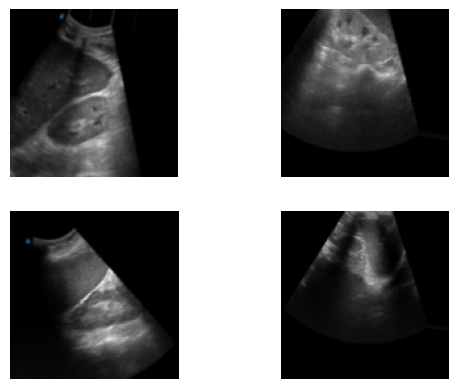

In [47]:
# Visualize the augumented images
augumented_images = next(data_generator.flow(
    train_images_np,
    train_labels_np,
    batch_size = 4
))

for i in range (4):
    plt.subplot(2, 2, i+1)
    plt.imshow(augumented_images[0][i])
    plt.axis('off')
plt.show()

Summary of Step 2

==> Load and Resize Images: Resize all images to a consistent size suitable for your model.

==> Normalize Images: Scale pixel values to a range [0, 1] to make the data easier for the model to process.

==> Data Augmentation: Increase the diversity of your training set by applying random transformations to the images.

# Step 3: Model Building

In this step, we'll create a convolutional neural network (CNN) model to predict the likelihood of renal failure from kidney ultrasound images.

CNNs are particularly well-suited for image classification tasks due to their ability to automatically learn spatial hierarchies of features. 

**3.1 Define the Model Architecture**

A simple yet effective CNN architecture might consist of multiple convolutional layers followed by max-pooling layers, ending with fully connected layers. We'll start with a basic architecture and then explore ways to improve it.

In [48]:
from tensorflow.keras import layers, models

In [49]:
# define the CNN model
model = models.Sequential()

# Add convolution layers with max-pooling
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape = (128, 128, 3)))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

# flatten the output frm the convolution layers
model.add(layers.Flatten())

# Add fully connected (dense) layers
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5)) # Add dropout for reguarization

# Output layer with a single neuron and sigmoid activation for binary classification
model.add(layers.Dense(1, activation='sigmoid'))

In [50]:
# Display the summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 128)       0

**3.2 Compile the Model**

After defining the model architecture, the next step is to compile it. During compilation, you'll need to specify:

**Loss Function:** For binary classification tasks, the binary cross-entropy loss function is appropriate.

**Optimizer:** Adam is a commonly used optimizer that adapts the learning rate during training.

**Metrics:** We'll monitor the AUC metric, which is the evaluation criterion for this challenge.

In [56]:
model.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
#     metrics = [tf.keras.metrics.AUC(name='auc')]
    metrics = ['accuracy', tf.keras.metrics.AUC(name='auc')]
    
)

**3.3 Train the Model**

Now, we'll train the model using the training dataset.

It's common to use a validation set to monitor the model's performance on unseen data during training.

In [57]:
# split the data
from sklearn.model_selection import train_test_split

X_train, X_validation, y_train, y_validation = train_test_split(
    train_images_np,
    train_labels_np,
    test_size=0.2,
    random_state=42
)

In [58]:
# Train the model
history = model.fit(
    data_generator.flow(X_train, y_train, batch_size=32), #use augumented data
    steps_per_epoch = len(X_train) // 32,
    epochs = 20, # adjust based on performance
    validation_data = (X_validation, y_validation)
)

Epoch 1/20
2/2 [==============================] - 7s 3s/step - loss: 0.6574 - accuracy: 0.6250 - auc: 0.5941 - val_loss: 0.6819 - val_accuracy: 0.6500 - val_auc: 0.7500
Epoch 2/20
2/2 [==============================] - 3s 1s/step - loss: 0.6814 - accuracy: 0.7031 - auc: 0.7297 - val_loss: 0.5816 - val_accuracy: 0.7000 - val_auc: 0.7500
Epoch 3/20
2/2 [==============================] - 3s 1s/step - loss: 0.6290 - accuracy: 0.5938 - auc: 0.7252 - val_loss: 0.5216 - val_accuracy: 0.7000 - val_auc: 0.7679
Epoch 4/20
2/2 [==============================] - 2s 860ms/step - loss: 0.6744 - accuracy: 0.5625 - auc: 0.7011 - val_loss: 0.5227 - val_accuracy: 0.7000 - val_auc: 0.7679
Epoch 5/20
2/2 [==============================] - 3s 1s/step - loss: 0.6021 - accuracy: 0.6094 - auc: 0.7728 - val_loss: 0.5252 - val_accuracy: 0.7000 - val_auc: 0.7738
Epoch 6/20
2/2 [==============================] - 3s 2s/step - loss: 0.6134 - accuracy: 0.6042 - auc: 0.7287 - val_loss: 0.5091 - val_accuracy: 0.7000 -

**3.4 Evaluate the Model**

After training, we’ll evaluate the model on the validation set to see how well it performs.

In [60]:
# # Evaluate the Model on the validation set
# validation_loss, validation_accuracy = model.evaluate(X_validation, y_validation)
# print(f"Validation AUC: {validation_accuracy}")

In [61]:
# Extract accuracy and AUC from training history
train_accuracy = history.history['accuracy'][-1]
validation_accuracy = history.history['val_accuracy'][-1]
train_auc = history.history['auc'][-1]
validation_auc = history.history['val_auc'][-1]

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Validation Accuracy: {validation_accuracy:.4f}")
print("")
print(f"Training AUC: {train_auc:.4f}")
print(f"Validation AUC: {validation_auc:.4f}")


Training Accuracy: 0.7500
Validation Accuracy: 0.6500

Training AUC: 0.8403
Validation AUC: 0.8095


**3.5 Plot the Training History**

For a more visual representation, you can plot the accuracy and loss over the training epochs:

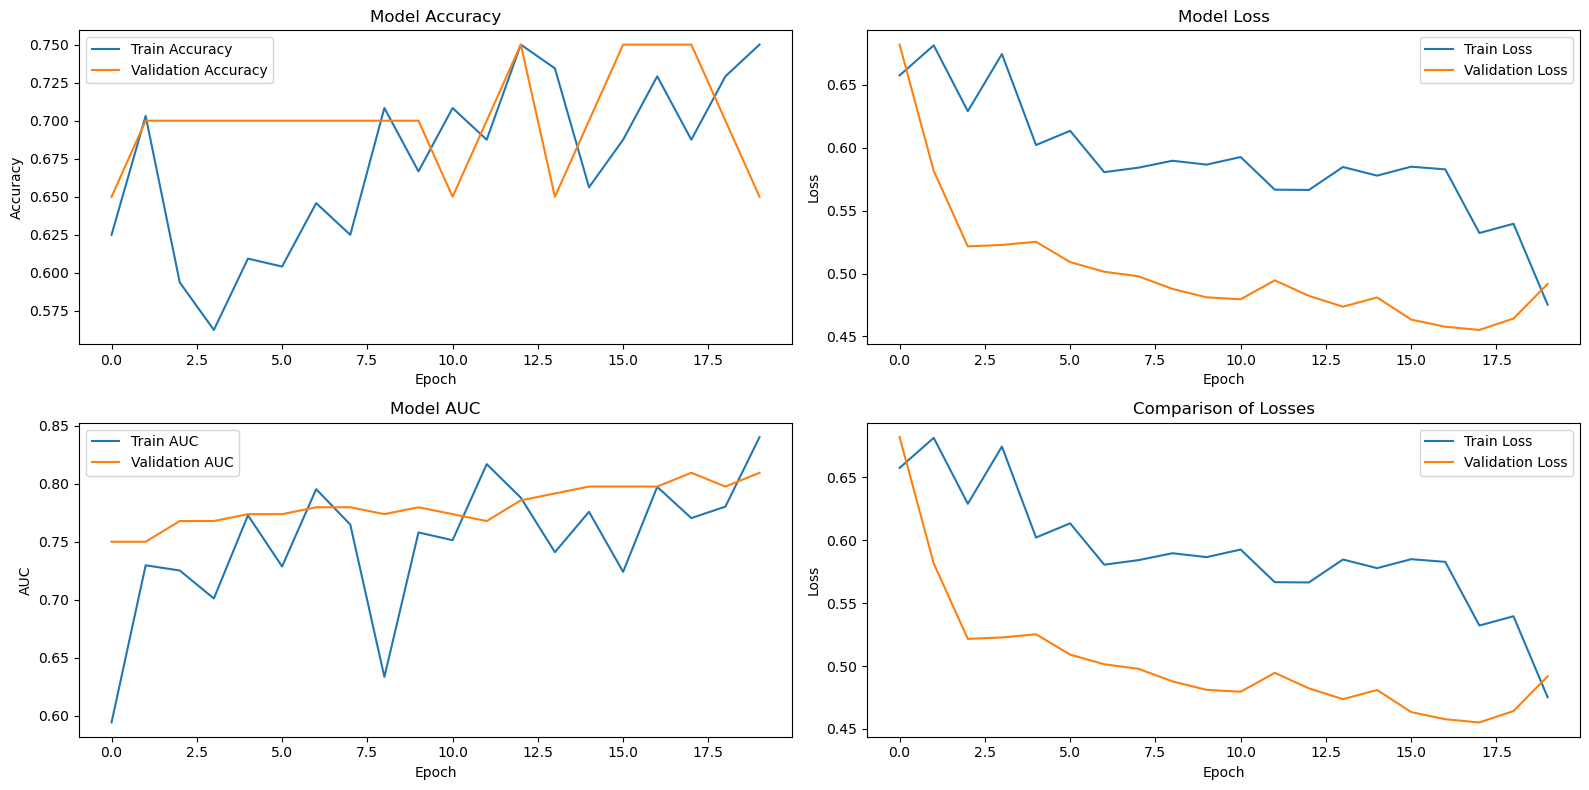

In [66]:
# Plot training & validation metrics
plt.figure(figsize=(16, 8))

# Plot training & validation accuracy
plt.subplot(2, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

# Plot training & validation loss
plt.subplot(2, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

# Plot training & validation AUC
plt.subplot(2, 2, 3)
plt.plot(history.history['auc'], label='Train AUC')
plt.plot(history.history['val_auc'], label='Validation AUC')
plt.title('Model AUC')
plt.ylabel('AUC')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

# Plot a fourth metric (optional) or repeat AUC/loss for comparison
plt.subplot(2, 2, 4)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Comparison of Losses')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()


**Summary**

By adding the accuracy metric to the model compilation, you can track how well the model is doing on both the training and validation sets. After training, you can print the accuracy and AUC scores to assess the model's performance.

**Step 4: Model Evaluation on Test Data**

After training and validating the model, the next step is to evaluate its performance on the test dataset. This will help determine how well the model generalizes to unseen data.

**4.1 Load and Preprocess the Test Data**

Assuming that the test images are in the same format as the training images, we’ll need to load and preprocess these images similarly.

In [72]:
# Access the directory where your images are there
images_directory_for_test = 'F:\\DATA SCIENCE SKILLS TECHNOLOGY\\FIELD PPT 2024- AI, ML\\CAMEROON ANALYTICS\\images\\CAMAIRAI BOX READY\\'

In [73]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

test_images = []
for image_id in test_data['img_IDs']:
    image_path = images_directory_for_test + image_id + '.JPG' # ensure correct file extension
    image = load_img(image_path, target_size = (128, 128))
    image_array = img_to_array(image) / 255.0 # Normalize the images
    test_images.append(image_array)
    
test_images_np = np.array(test_images)

**4.2 Make Predictions on Test Data**

Use the trained model to predict the probabilities of renal failure for each test image.

In [75]:
test_predictions = model.predict(test_images_np)

# Attach predictions to the test dataframe
test_data['target'] = test_predictions

2/2 [==============================] - 0s 31ms/step


**4.3 Save the Predictions**

You’ll need to format your predictions according to the submission format and save them to a CSV file.

In [76]:
submission_data = test_data[['img_IDs', 'target']]
submission_data.to_csv('ipt-submission.csv', index=False)

**4.4 Interpret the Results**

You can explore the distribution of your predicted probabilities to get a sense of how confident your model is in its predictions:

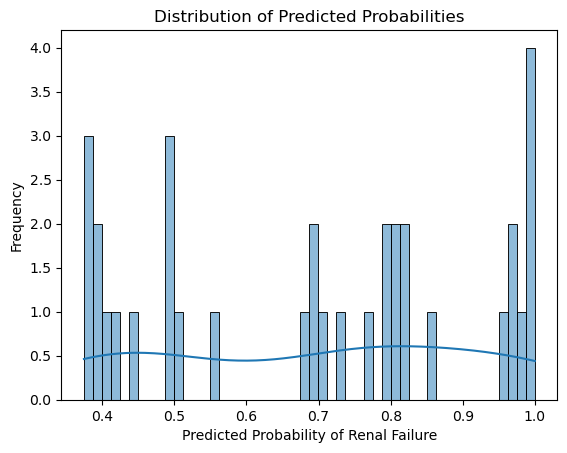

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(test_data['Target'], bins=50, kde=True)
plt.title('Distribution of Predicted Probabilities')
plt.xlabel('Predicted Probability of Renal Failure')
plt.ylabel('Frequency')
plt.show()
